# Visualization of UMAP plots

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
sc.settings.verbosity = 0
import anndata as ad
import os
import sys

In [2]:
count = pd.read_csv("./data/GSE147747_expr_raw_counts_table.tsv",
                    sep="\t", index_col=0)

meta = pd.read_csv("./data/GSE147747_meta_table.tsv",
                   sep="\t", index_col=0)

adata_st_all = ad.AnnData(X = count.values)

adata_st_all.obs.index = count.index
adata_st_all.obs = meta.loc[adata_st_all.obs.index]
adata_st_all.var.index = count.columns

sc.pp.filter_cells(adata_st_all, min_genes=1)

In [3]:
adata_st_list = []

slice_use = ['01A', '02A', '03A', '04B', '05A', '06B', '07A', '08B', '09A', '10B',
 '11A', '12A', '13B', '14A', '15A', '16A', '17A', '18A', '19A', '20B',
 '21A', '22A', '23A', '24A', '25A', '26A', '27A', '28A', '29A', '30A',
 '31A', '32A', '33A', '34A', '35A',]

for i in range(len(slice_use)):
    adata_st_i = adata_st_all[adata_st_all.obs.section_index==slice_use[i]]
    adata_st_i.obs.index = adata_st_i.obs.index + '-slice%d' % i
    adata_st_i.obs['section_id'] = i
    adata_st_list.append(adata_st_i)

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.
Trying to set attrib

In [4]:
res_path = './results_mouse_brain'

latent = pd.read_csv(res_path+'/representation.csv', index_col=0)

adata_all = ad.concat([adata_st_list[i] for i in range(len(slice_use))], index_unique=None)
adata_all_raw = adata_all.copy()

adata_all = adata_all[latent.index]
adata_all_raw = adata_all_raw[latent.index]

Plot UMAP of STitch3D's learned representations

/home/gwangas/.local/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/gwangas/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'section_index' as categorical
/home/gwangas/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.cate

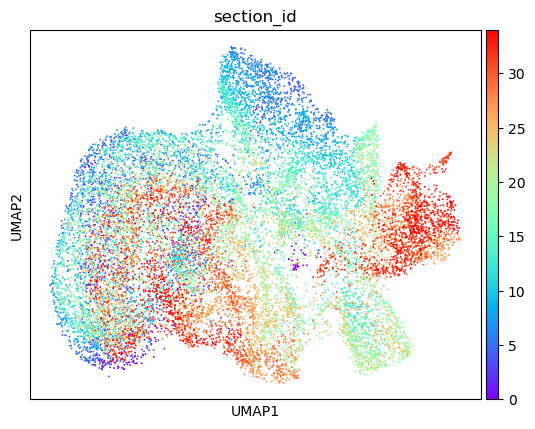

In [5]:
adata_all.obsm['latent'] = np.array(latent.values)

sc.pp.neighbors(adata_all, use_rep='latent', n_neighbors=30)
sc.tl.umap(adata_all)
sc.pl.umap(adata_all, color="section_id", color_map="rainbow")

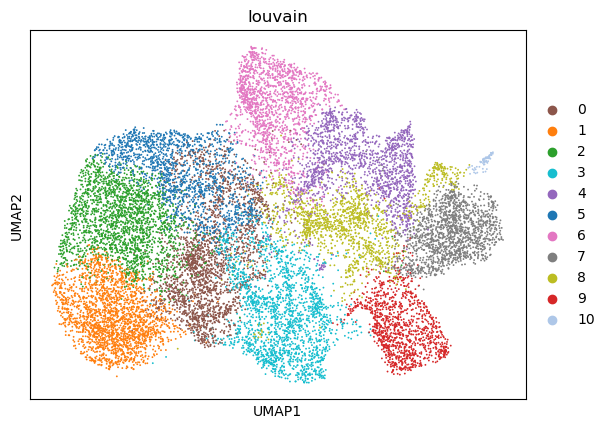

In [6]:
sc.tl.louvain(adata_all, resolution=0.8)
colours = ['#8c564b', '#ff7f0e', '#2ca02c', '#17becf', '#9467bd', '#1f77b4', '#e377c2', '#7f7f7f', '#bcbd22', '#d62728', '#aec7e8']
sc.pl.umap(adata_all, color="louvain", palette={str(i): colours[i] for i in range(11)})